# Dataprep

In [ ]:
n jobs

### Load data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from os import listdir
from os.path import isfile, join
mypath = "data/parsed/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [42]:
books_data = np.array([np.loadtxt(mypath+file) for file in onlyfiles])   
books_data[:10]

array([array([-0.01374749,  0.08589474, -0.89842469, ..., -0.30054307,
       -0.92611587,  0.28873625]),
       array([ 0.96793348,  0.08589474,  0.36325884, ..., -0.33862054,
       -0.4513633 , -0.96548128]),
       array([-0.3098301 ,  0.08589474, -0.07333611, ...,  0.33576477,
       -0.70888615,  0.58441907]),
       array([ 0.35198829,  0.08589474,  0.55426872, ..., -0.80775893,
       -0.91561019, -0.26483309]),
       array([ 0.53342199,  0.08589474, -0.07333611, ..., -0.22735733,
        0.96067524, -0.44441256]),
       array([-0.95813423,  0.08589474, -0.07333611, ...,  0.97271168,
       -0.58751982, -0.7682054 ]),
       array([-0.35715196,  0.08589474,  0.07990979, ..., -0.82186961,
        0.79038155, -0.80820262]),
       array([ 0.39521933,  0.08589474, -0.07333611, ..., -0.7515924 ,
        0.96398902, -0.7996912 ]),
       array([-0.35715196,  0.08589474, -0.01602338, ..., -0.70499218,
        0.79038155, -0.80820262]),
       array([ 0.54227006,  0.08589474, -0.902

In [43]:
max_len = np.max([book.shape[0] for book in books_data])
max_len

50497

### Unify data

stretch sequences to the length of the longest sequence:

In [44]:
from random import sample

def stretch(max_len, arr):
    """
    Stretches an array to the max_len by
    inserting mean of neighbours enough times
    """
    diff = max_len-len(arr)
    inds = np.random.choice(len(arr)-1, diff, replace=True)
    inds.sort()
    inds = np.flip(inds, 0)
    for i in inds:
        ins_value = (arr[i] + arr[i+1]) / 2
        arr = np.concatenate((arr[:i+1], [ins_value], arr[i+1:]))
    return arr
        

In [45]:
books_data = np.array([stretch(max_len, i) for i in books_data])

In [46]:
np.unique([len(book) for book in books_data])

array([50497])

### Data processing

__smooth data:__

In [91]:
books_data = pd.DataFrame(data=books_data.T, columns=onlyfiles)
books_data.head()

,31 - Unknown.txt,Of Mice and Men - John Steinbeck.txt,16 - Unknown.txt,2 - Unknown.txt,The Thirty-nine Steps - John Buchan.txt,10 - Unknown.txt,Harry Potter and the Half-Blood - J.K. Rowling.txt,Brave New World - Aldous Leonard Huxley.txt,Harry Potter and the Prisoner o - J.K. Rowling.txt,The Count of Monte Cristo - Alexandre Dumas.txt,...,1 - Unknown.txt,8 - Unknown.txt,War and Peace - Unknown.txt,Andrzej Sapkowski The Last Wish - DragonAshe.txt,Harry Potter and the Goblet of - J.K. Rowling.txt,12 - Unknown.txt,The Last of the Mohicans - James Fenimore Cooper.txt,Great Expectations - Charles Dickens.txt,6 - Unknown.txt,The Moonstone - Wilkie Collins.txt
0,-0.013747,0.967933,-0.309830,0.351988,0.533422,-0.958134,-0.357152,0.395219,-0.357152,0.542270,...,-0.805963,0.974695,0.437460,0.255282,-0.357152,-0.794399,0.351413,0.962781,0.132070,0.254699
1,0.011163,0.964488,-0.111968,0.351988,0.533422,-0.697127,-0.135629,0.394011,0.085895,0.314082,...,-0.792028,0.946920,0.261677,0.249988,-0.135629,-0.794399,0.351153,0.743559,0.131348,0.212498
2,0.036074,0.961043,0.085895,0.351988,0.533421,-0.436120,0.085895,0.392803,0.034936,0.085895,...,-0.778092,0.919145,0.085895,0.244695,0.085895,-0.794399,0.350894,0.524338,0.130627,0.170297
3,0.085895,0.954152,0.006279,0.351988,0.533420,0.085895,0.084399,0.390386,-0.016023,-0.902707,...,-0.750222,0.863595,0.986441,0.234108,0.350076,-0.794399,0.350376,0.085895,0.129184,0.085895
4,-0.406265,0.940370,-0.073336,0.351988,0.533419,0.006279,0.082902,0.385553,0.079983,-0.655557,...,-0.694481,0.752495,-0.853602,0.212935,0.614257,-0.794399,0.349338,0.030962,0.126298,0.167157


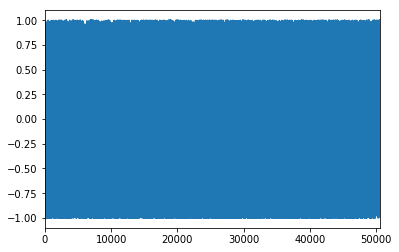

In [48]:
books_data['A Game Of Thrones - George R. R. Martin.txt'].plot()
plt.show()

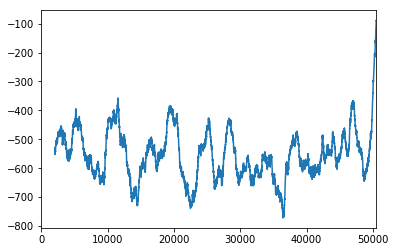

In [49]:
books_data['A Game Of Thrones - George R. R. Martin.txt'].rolling(2000).sum().plot()
plt.show()

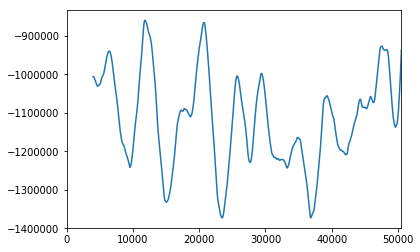

In [65]:
books_data['A Game Of Thrones - George R. R. Martin.txt'].rolling(2000).sum().rolling(2000).sum().plot()
plt.show()

In [114]:
smoothed_books = pd.DataFrame()
for book in onlyfiles:
    smoothed_books[book] = books_data[book].rolling(2000).sum().rolling(2000).sum().rolling(2000).sum()
smoothed_books = smoothed_books[6000:]

In [59]:
smoothed_books.head()

,31 - Unknown.txt,Of Mice and Men - John Steinbeck.txt,16 - Unknown.txt,2 - Unknown.txt,The Thirty-nine Steps - John Buchan.txt,10 - Unknown.txt,Harry Potter and the Half-Blood - J.K. Rowling.txt,Brave New World - Aldous Leonard Huxley.txt,Harry Potter and the Prisoner o - J.K. Rowling.txt,The Count of Monte Cristo - Alexandre Dumas.txt,...,1 - Unknown.txt,8 - Unknown.txt,War and Peace - Unknown.txt,Andrzej Sapkowski The Last Wish - DragonAshe.txt,Harry Potter and the Goblet of - J.K. Rowling.txt,12 - Unknown.txt,The Last of the Mohicans - James Fenimore Cooper.txt,Great Expectations - Charles Dickens.txt,6 - Unknown.txt,The Moonstone - Wilkie Collins.txt
6000,-2.501362e+09,-2.410058e+09,-3.229944e+09,-4.286033e+09,-2.947000e+09,-2.340015e+09,-2.538040e+09,-1.194467e+09,-2.296615e+09,-3.419700e+09,...,-2.868478e+09,-3.957191e+09,-2.160507e+09,-2.900443e+09,-2.607345e+09,-4.738056e+09,-4.137355e+09,-4.315588e+09,-2.350515e+09,-3.362640e+09
6001,-2.501050e+09,-2.410432e+09,-3.230199e+09,-4.285725e+09,-2.947274e+09,-2.340015e+09,-2.537783e+09,-1.194412e+09,-2.296663e+09,-3.419490e+09,...,-2.868473e+09,-3.957449e+09,-2.160564e+09,-2.900705e+09,-2.607182e+09,-4.738941e+09,-4.137366e+09,-4.315556e+09,-2.350640e+09,-3.362944e+09
6002,-2.500737e+09,-2.410805e+09,-3.230454e+09,-4.285416e+09,-2.947548e+09,-2.340014e+09,-2.537526e+09,-1.194357e+09,-2.296711e+09,-3.419280e+09,...,-2.868468e+09,-3.957708e+09,-2.160621e+09,-2.900968e+09,-2.607018e+09,-4.739826e+09,-4.137377e+09,-4.315524e+09,-2.350765e+09,-3.363247e+09
6003,-2.500425e+09,-2.411179e+09,-3.230708e+09,-4.285107e+09,-2.947823e+09,-2.340014e+09,-2.537269e+09,-1.194302e+09,-2.296759e+09,-3.419070e+09,...,-2.868465e+09,-3.957965e+09,-2.160677e+09,-2.901230e+09,-2.606855e+09,-4.740710e+09,-4.137389e+09,-4.315491e+09,-2.350890e+09,-3.363551e+09
6004,-2.500112e+09,-2.411552e+09,-3.230962e+09,-4.284799e+09,-2.948097e+09,-2.340014e+09,-2.537013e+09,-1.194245e+09,-2.296807e+09,-3.418861e+09,...,-2.868463e+09,-3.958222e+09,-2.160733e+09,-2.901492e+09,-2.606691e+09,-4.741594e+09,-4.137402e+09,-4.315458e+09,-2.351015e+09,-3.363854e+09


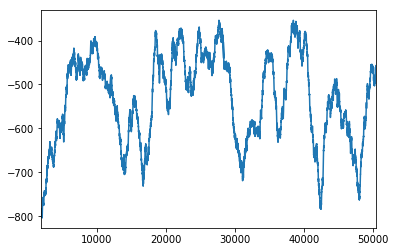

In [104]:
smoothed_books['Harry Potter and the Half-Blood - J.K. Rowling.txt'].plot()
plt.show()

In [115]:
train_books_data = smoothed_books.values.T

__shrink data__

In [105]:
shrinked_books = []
for book in smoothed_books.values.T:
    shrinked_books.append(np.array([np.mean(arr) for arr in np.array_split(book, 2000)]))
shrinked_books = np.array(shrinked_books)
shrinked_books.shape

(129, 2000)

In [106]:
train_books_data = shrinked_books

# Clustering

In [107]:
from sklearn.cluster import DBSCAN, KMeans

In [108]:
train_books_data.shape

(129, 2000)

### K-means

#### elbow method to determine K:

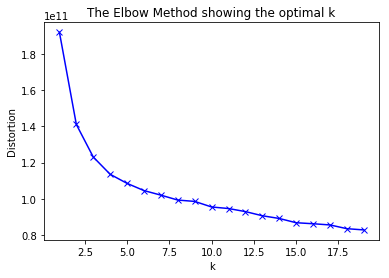

In [116]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(train_books_data)
    kmeanModel.fit(train_books_data)
    distortions.append(sum(np.min(cdist(train_books_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / train_books_data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Cluster:

In [122]:
kmeans = KMeans(n_clusters=9, random_state=0, ).fit(train_books_data)
kmeans_pred = kmeans.predict(train_books_data)
kmeans_pred

array([1, 8, 2, 7, 4, 1, 1, 5, 1, 0, 1, 8, 1, 1, 5, 8, 3, 1, 1, 8, 1, 0,
       7, 1, 1, 1, 4, 8, 2, 1, 2, 7, 2, 8, 0, 3, 8, 8, 8, 4, 0, 3, 8, 8,
       4, 3, 3, 5, 0, 4, 0, 1, 4, 2, 0, 4, 8, 1, 8, 1, 4, 7, 2, 8, 4, 7,
       1, 0, 1, 4, 4, 4, 2, 1, 8, 0, 3, 4, 0, 2, 0, 4, 0, 8, 2, 0, 4, 8,
       2, 3, 4, 0, 4, 0, 2, 7, 8, 1, 4, 8, 3, 2, 0, 2, 2, 4, 4, 2, 8, 4,
       2, 7, 8, 1, 2, 2, 4, 6, 2, 7, 0, 8, 8, 1, 7, 0, 0, 8, 0],
      dtype=int32)

In [123]:
kmeans.cluster_centers_

array([[-3.55822532e+09, -3.55837084e+09, -3.55851638e+09, ...,
        -3.90332902e+09, -3.90328049e+09, -3.90323184e+09],
       [-2.07172499e+09, -2.07162854e+09, -2.07153215e+09, ...,
        -1.98562905e+09, -1.98547594e+09, -1.98532285e+09],
       [-3.22431602e+09, -3.22437400e+09, -3.22443179e+09, ...,
        -2.95338313e+09, -2.95328108e+09, -2.95317904e+09],
       ...,
       [-2.62304554e+09, -2.62301224e+09, -2.62297828e+09, ...,
        -6.59034651e+09, -6.59038510e+09, -6.59042345e+09],
       [-3.88831527e+09, -3.88836708e+09, -3.88841884e+09, ...,
        -4.73316343e+09, -4.73305413e+09, -4.73294479e+09],
       [-2.59774830e+09, -2.59781525e+09, -2.59788215e+09, ...,
        -2.51387643e+09, -2.51379863e+09, -2.51372082e+09]])

#### visualize with T-SNE

In [124]:
from sklearn.manifold import TSNE

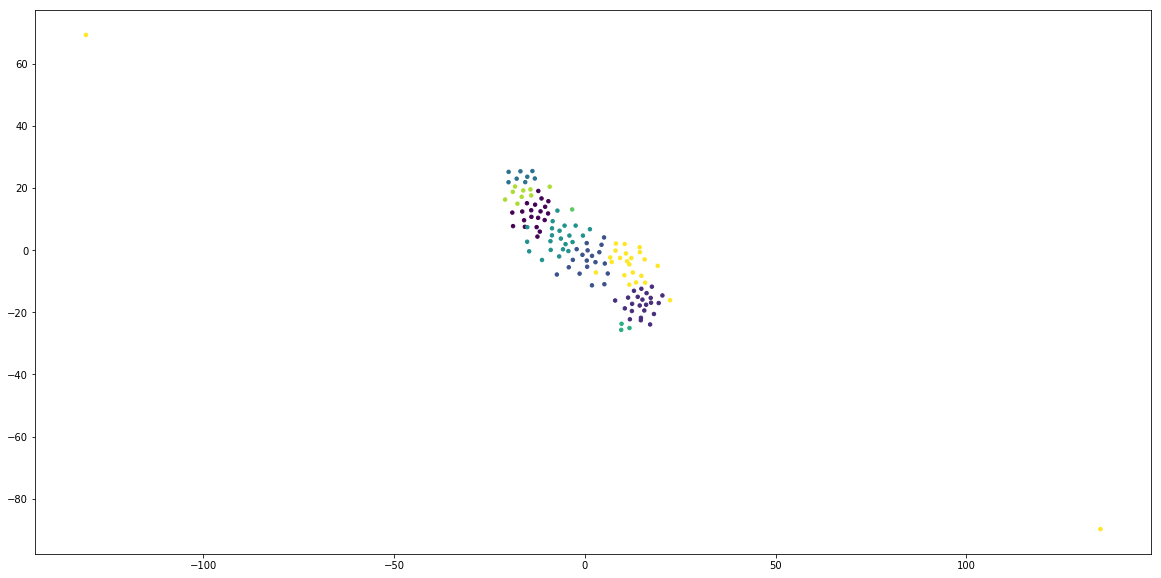

In [125]:
tsne = TSNE(n_components=2, n_iter = 300, random_state=0)
books_tsne = tsne.fit_transform(train_books_data)
# books_tsne = np.array([i for i in books_tsne if i[0]<50 and i[1]<50])
# kmeans_pred = np.array([i for i,j in zip(kmeans_pred, books_tsne) if j[0]<50 and j[1]<50])
plt.figure(figsize=(20,10))
plt.scatter(books_tsne[:,0], books_tsne[:,1], s=12, c=kmeans_pred);
plt.show()

In [126]:
clusters = [[name for name,l in zip(onlyfiles,kmeans_pred) if l==label] for label in [0,1,2,3,4]]
for label in [0,1,2,3,4]:
    print('=========CLUSTER ' + str(label))
    print(clusters[label])

=========CLUSTER 0
['The Count of Monte Cristo - Alexandre Dumas.txt', '21 - Unknown.txt', '20 - Unknown.txt', 'The Return of Sherlock Holmes - Arthur Conan Doyle.txt', '4 - Unknown.txt', '22 - Unknown.txt', 'Memoirs of Sherlock Holmes - SIR ARTHUR CONAN DOYLE.txt', '19 - e-booksdirectory.com.txt', 'Twenty Thousand Leagues Under t - Jules Verne.txt', 'Pinocchio - Carlo Collodi.txt', 'Tales of Terror and Mystery - SIR ARTHUR CONAN DOYLE.txt', 'The Wind in the Willows - Kenneth Grahame.txt', "Grimm's Fairy Stories - Unknown.txt", 'Nostromo - Joseph Conrad.txt', 'Dracula - Unknown.txt', 'The Lost World - SIR ARTHUR CONAN DOYLE.txt', '8 - Unknown.txt', 'The Last of the Mohicans - James Fenimore Cooper.txt', 'Great Expectations - Charles Dickens.txt', 'The Moonstone - Wilkie Collins.txt']
=========CLUSTER 1
['31 - Unknown.txt', '10 - Unknown.txt', 'Harry Potter and the Half-Blood - J.K. Rowling.txt', 'Harry Potter and the Prisoner o - J.K. Rowling.txt', 'A Feast For Crows - George R. R. Mar

#### Evaluation

In [20]:
from sklearn.metrics import davies_bouldin_score, silhouette_samples, silhouette_score

* DBi

The DB index captures the intuition that clusters that are (1) well-spaced from each other and (2) themselves very dense are likely a ‘good’ clustering. This is because the measure’s ‘max’ statement repeatedly selects the values where the average point is farthest away from its centroid, and where the centroids are closest together. As the DB index shrinks, the clustering is considered ‘better’.

In [19]:
davies_bouldin_score(train_books_data, kmeans_pred)

0.6748956409482508

* Silhouette Coefficient

The Silhouette Coefficient tells us how well-assigned each individual point is. If S(i) is close to 0, it is right at the inflection point between two clusters. If it is closer to -1, then we would have been better off assigning it to the other cluster. If S(i) is close to 1, then the point is well-assigned and can be interpreted as belonging to an ‘appropriate’ cluster.

The Silhouette Coefficient is a measure of how well samples are clustered with samples that are similar to themselves. Clustering models with a high Silhouette Coefficient are said to be dense, where samples in the same cluster are similar to each other, and well separated, where samples in different clusters are not very similar to each other.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.

In [21]:
silhouette_score(train_books_data, kmeans_pred)

0.017241841

In [23]:
silhouette_samples(train_books_data, kmeans_pred)

array([0.03451678, 0.03517154, 0.        , 0.01652089, 0.        ],
      dtype=float32)

### DBSCAN

#### Cluster:

In [257]:
dbscan = DBSCAN(eps=3, min_samples=2).fit(train_books_data)

In [258]:
dbscan.labels_

array([-1, -1, -1, -1, -1])

#### Evaluation

# Models comparison & conclusions